# Graduation rates of US colleges - Project 1

# Imports and connecting to Drive

In [254]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 3439 - Spring 2023/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading Data

In [256]:
df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/university_graduation/degree completions.csv')
df.head()

,UNITID,XCSTOTLT,CSTOTLT,XCSTOTLM,CSTOTLM,XCSTOTLW,CSTOTLW,XCSAIANT,CSAIANT,XCSAIANM,...,XCSUNKNM,CSUNKNM,XCSUNKNW,CSUNKNW,XCSNRALT,CSNRALT,XCSNRALM,CSNRALM,XCSNRALW,CSNRALW
0,100654,R,821,R,264,R,557,R,2,R,...,R,17,R,60,R,20,R,9,R,11
1,100663,R,6039,R,2109,R,3930,R,16,R,...,R,45,R,53,R,353,R,193,R,160
2,100690,R,217,R,83,R,134,R,1,R,...,R,3,R,3,R,0,R,0,R,0
3,100706,R,2222,R,1145,R,1077,R,24,R,...,R,12,R,52,R,94,R,63,R,31
4,100724,R,652,R,216,R,436,R,0,R,...,R,5,R,6,R,10,R,7,R,3


In [257]:
df2 = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/university_graduation/university info.csv', encoding= 'unicode_escape')
df2.head()

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,93,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,127,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,93,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,99,1


In [258]:
df3 = pd.read_csv('/content/StatePop.csv', encoding='utf-8')

df3['Population']=df3['Population'].str.replace(',','')
df3['State']=df3['State'].str.replace('.','')


df3['Population'] = df3['Population'].astype(int)
df3.head()

<ipython-input-258-5994eea10f58>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['State']=df3['State'].str.replace('.','')


,State,STABBR,Population
0,Alabama,AL,5031362
1,Alaska,AK,732923
2,Arizona,AZ,7179943
3,Arkansas,AR,3014195
4,California,CA,39501653


# Cleaning up Data
Data was cleaned by merging dataframes and renaming and dropping columns.

In [259]:
# Taking the important columns from df2
df2 = df2[['UNITID', 'INSTNM', "CITY", "STABBR", 'LONGITUD', "LATITUDE"]]

In [260]:
# Combining the dataframes on the unit id, so that the names of the schools are present
combineddf = pd.merge(df, df2, on = "UNITID")

In [261]:
# Dropping columns of data we don't use, like if the data was reported or not, as well as some race/ethnicity data from groups we didn't look into

combineddf = combineddf.drop(['CSAIANM', 'CSAIANW', 'CSNHPIM', 'CSNHPIW', 'CS2MORM', 'CS2MORW',  'CSUNKNM', 'CSUNKNW', 'XCSTOTLT','XCSTOTLM','XCSTOTLW','XCSAIANT','XCSAIANM','XCSAIANW','XCSASIAT','XCSASIAM','XCSBKAAT','XCSBKAAM','XCSBKAAW','XCSHISPT','XCSHISPM','XCSHISPW','XCSNHPIT','XCSNHPIM',
'XCSNHPIW','XCSWHITT','XCSWHITM','XCSWHITW','XCS2MORT','XCS2MORM','XCS2MORW','XCSUNKNT','XCSUNKNM','XCSUNKNW','XCSNRALT','XCSNRALM','XCSNRALW', 'XCSASIAW'], axis=1)
combineddf.columns

Index(['UNITID', 'CSTOTLT', 'CSTOTLM', 'CSTOTLW', 'CSAIANT', 'CSASIAT',
       'CSASIAM', 'CSASIAW', 'CSBKAAT', 'CSBKAAM', 'CSBKAAW', 'CSHISPT',
       'CSHISPM', 'CSHISPW', 'CSNHPIT', 'CSWHITT', 'CSWHITM', 'CSWHITW',
       'CS2MORT', 'CSUNKNT', 'CSNRALT', 'CSNRALM', 'CSNRALW ', 'INSTNM',
       'CITY', 'STABBR', 'LONGITUD', 'LATITUDE'],
      dtype='object')

In [262]:
# Making an "Other" column of the pacific islander, alsakan, native american, or 2 or more races columns
combineddf['Other'] = combineddf['CSAIANT'] + combineddf['CSNHPIT'] + combineddf['CSUNKNT'] + combineddf['CS2MORT']


# Dropping them after grouped into the "Other" column
combineddf = combineddf.drop(['CSAIANT', 'CSNHPIT', 'CSUNKNT', 'CS2MORT'], axis=1)
combineddf.columns

Index(['UNITID', 'CSTOTLT', 'CSTOTLM', 'CSTOTLW', 'CSASIAT', 'CSASIAM',
       'CSASIAW', 'CSBKAAT', 'CSBKAAM', 'CSBKAAW', 'CSHISPT', 'CSHISPM',
       'CSHISPW', 'CSWHITT', 'CSWHITM', 'CSWHITW', 'CSNRALT', 'CSNRALM',
       'CSNRALW ', 'INSTNM', 'CITY', 'STABBR', 'LONGITUD', 'LATITUDE',
       'Other'],
      dtype='object')

In [263]:
# Remaning everything into english
combineddf = combineddf.rename(columns={'CSTOTLT': 'Grand total', 'CSTOTLM': 'Grand total men', 'CSTOTLW': 'Grand total women', 'CSASIAT': 'Asian total',
                                        'CSASIAM': 'Asian total men', 'CSASIAW': 'Asian total female', 'CSBKAAT': 'Black total', 'CSBKAAM': 'Black total men',
                                        'CSBKAAW': 'Black total women', 'CSHISPT': 'Hispanic total', 'CSHISPM': 'Hispanic total men', 'CSHISPW': 'Hispanic total female',
                                        'CSWHITT': 'White total', 'CSWHITM': 'White total men', 'CSWHITW': 'White total female', 'CSNRALT': 'Nonresident alien total',
                                        'CSNRALM': 'Nonresident alien total men', 'CSNRALW ': 'Nonresident alien total female'})
combineddf.columns

Index(['UNITID', 'Grand total', 'Grand total men', 'Grand total women',
       'Asian total', 'Asian total men', 'Asian total female', 'Black total',
       'Black total men', 'Black total women', 'Hispanic total',
       'Hispanic total men', 'Hispanic total female', 'White total',
       'White total men', 'White total female', 'Nonresident alien total',
       'Nonresident alien total men', 'Nonresident alien total female',
       'INSTNM', 'CITY', 'STABBR', 'LONGITUD', 'LATITUDE', 'Other'],
      dtype='object')

In [264]:
# Heres what the cleaned data looks like
combineddf.head()

,UNITID,Grand total,Grand total men,Grand total women,Asian total,Asian total men,Asian total female,Black total,Black total men,Black total women,...,White total female,Nonresident alien total,Nonresident alien total men,Nonresident alien total female,INSTNM,CITY,STABBR,LONGITUD,LATITUDE,Other
0,100654,821,264,557,1,1,0,679,219,460,...,14,20,9,11,Alabama A & M University,Normal,AL,-86.568502,34.783368,91
1,100663,6039,2109,3930,374,139,235,1158,322,836,...,2348,353,193,160,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,319
2,100690,217,83,134,1,0,1,119,27,92,...,34,0,0,0,Amridge University,Montgomery,AL,-86.174010,32.362609,7
3,100706,2222,1145,1077,95,49,46,181,68,113,...,759,94,63,31,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,128
4,100724,652,216,436,5,3,2,552,173,379,...,33,10,7,3,Alabama State University,Montgomery,AL,-86.295677,32.364317,21


# Graph for the States' 2020 Graduate Percentage and the Population Percentage

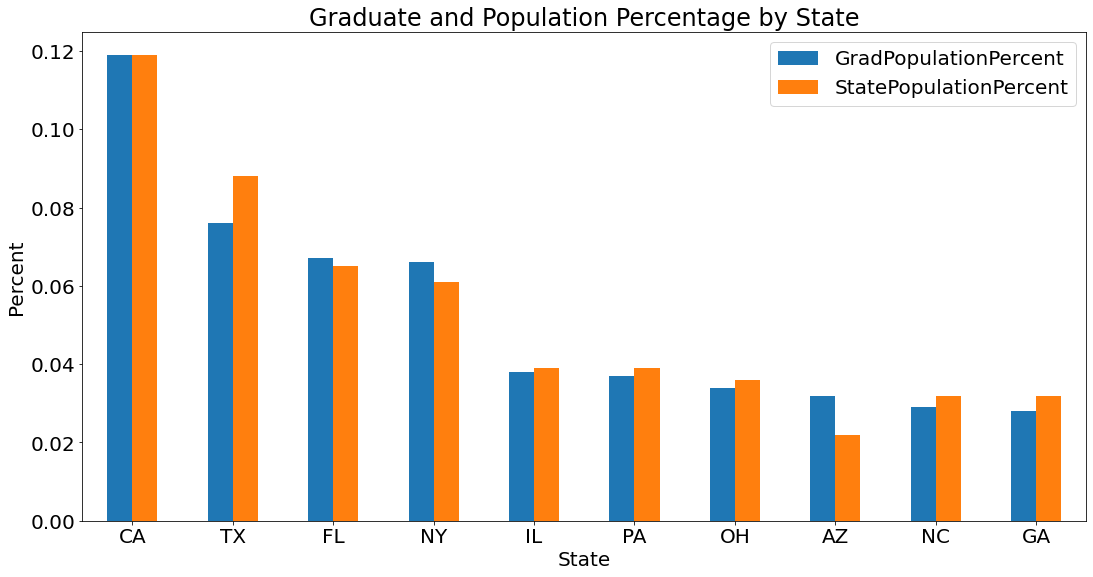

In [265]:
# newdf = combineddf.groupby('STABBR').agg({'Grand total': len})
newdf = combineddf.groupby('STABBR').agg({'Grand total': sum})

dfSorted = newdf.sort_values(by=['STABBR'], ascending = False)


dfSorted['GradPopulationPercent'] = newdf['Grand total']/newdf['Grand total'].sum()
dfSorted['GradPopulationPercent'] = dfSorted['GradPopulationPercent'].round(3)

dfSorted = dfSorted.sort_values(by=['GradPopulationPercent'], ascending = False)

dfSorted = dfSorted.merge(df3, on='STABBR')
dfSorted['StatePopulationPercent'] = dfSorted['Population']/ 331511512
dfSorted['StatePopulationPercent'] = dfSorted['StatePopulationPercent'].round(3)
dfSorted = dfSorted.set_index('STABBR')

dfSorted = dfSorted.drop(['Grand total', 'State', 'Population'], axis=1)

ax = dfSorted.head(10).plot.bar(figsize=(18,9), width=.5)

plt.xticks(rotation='horizontal')
plt.xlabel('State', size = 20)
plt.ylabel('Percent', size = 20)
plt.title('Graduate and Population Percentage by State')
plt.rc('font', size= 15)

plt.show()


# Making the 2020 Race Percentage by State Graph

In [266]:
newdf2 = combineddf.groupby('STABBR').agg({'Grand total': sum,
                                           'White total': sum,
                                           'Black total': sum,
                                           'Hispanic total': sum,
                                           'Asian total': sum,
                                           'Nonresident alien total':sum,
                                           'Other':sum})


newdf2['WhiteVsTotal'] = newdf2['White total']/ newdf2['Grand total']
newdf2['BlackVsTotal'] = newdf2['Black total']/ newdf2['Grand total']
newdf2['AsianVsTotal'] = newdf2['Asian total']/ newdf2['Grand total']
newdf2['LatinoVsTotal'] = newdf2['Hispanic total']/ newdf2['Grand total']
newdf2['NonresidentVsTotal'] = newdf2['Nonresident alien total']/ newdf2['Grand total']
newdf2['OtherVsTotal'] = newdf2['Other']/ newdf2['Grand total']

# newdf2 = newdf2.reset_index(drop=False)

newdf2 = pd.merge(newdf2, df3, on = "STABBR")
# newdf2.head()
newdf4 = newdf2[['STABBR','WhiteVsTotal', 'BlackVsTotal','LatinoVsTotal', 'AsianVsTotal',  'NonresidentVsTotal', 'OtherVsTotal']]
newdf4 = newdf4.rename(columns={'WhiteVsTotal': 'White', 'BlackVsTotal': 'Black', 'AsianVsTotal': 'Asian', 'LatinoVsTotal': 'Latino', 'NonresidentVsTotal': 'NonResident', 'OtherVsTotal': 'Other'})


newdf4.head()

,STABBR,White,Black,Latino,Asian,NonResident,Other
0,AK,0.557617,0.025736,0.079295,0.054023,0.019708,0.263622
1,AL,0.623093,0.207616,0.038174,0.019298,0.031131,0.080688
2,AR,0.686459,0.140297,0.069876,0.018370,0.031311,0.053687
3,AZ,0.444348,0.119102,0.217761,0.040797,0.030356,0.147636
4,CA,0.268721,0.051338,0.350445,0.154179,0.071504,0.103813


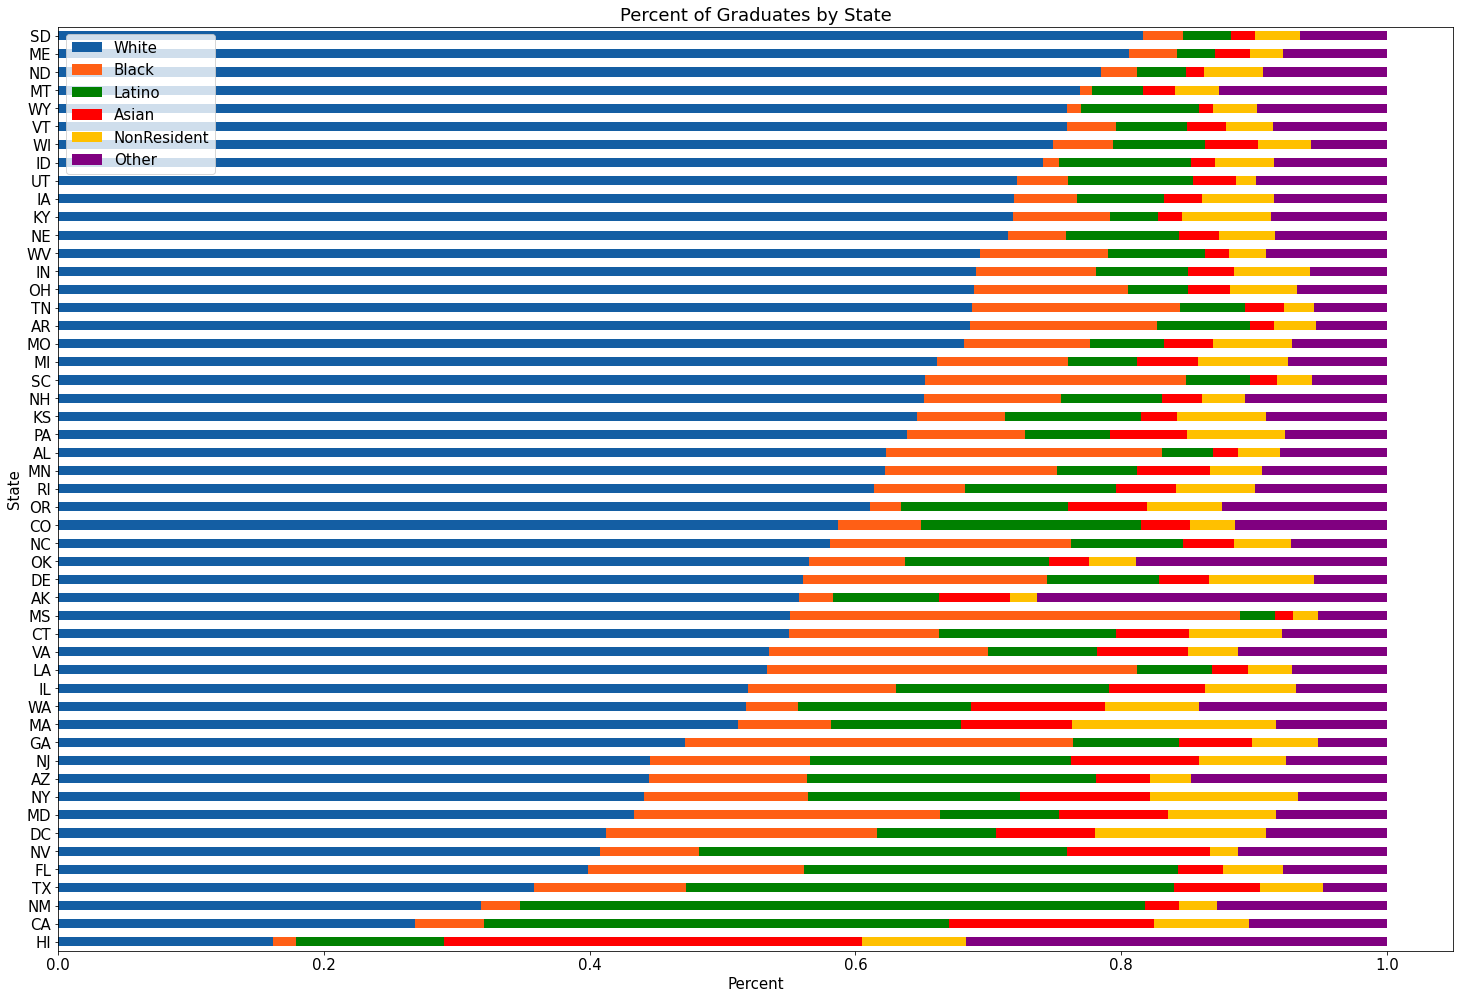

In [267]:
newdf4 = newdf4.sort_values(by=['White'], ascending = True)


newdf4.plot(x = 'STABBR', kind='barh', stacked=True,
        title='Percent of Graduates by State',
        figsize=(25,17), width=.5,
        color=['#145ea3', '#FF5F15', 'Green', 'Red', '#FFC000', 'purple'])
plt.ylabel('State')
plt.xlabel('Percent')
# plt.gca().xaxis.grid(True)

plt.show()

# Making the High and the Low States' 2020 Graduation Concentration

<Figure size 1800x648 with 0 Axes>

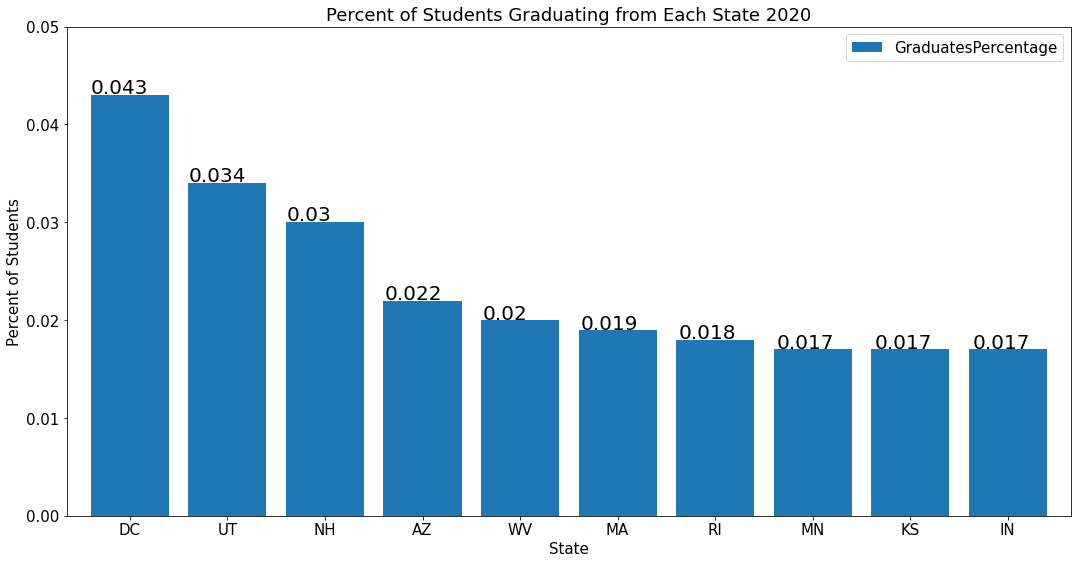

In [268]:
newdf2['GraduatesPercentage'] = newdf2['Grand total']/newdf2['Population']
newdf2



newdf5 = newdf2[['STABBR', 'GraduatesPercentage']]

newdf5 = newdf5.sort_values(by=['GraduatesPercentage'], ascending = False)

newdf5['GraduatesPercentage'] = newdf5['GraduatesPercentage'].round(3)
newdf5 = newdf5.set_index('STABBR')

plt.figure(figsize=(25, 9))

ax = newdf5.head(10).plot.bar(figsize=(18,9), width=.8)

plt.title('Percent of Students Graduating from Each State 2020')
plt.xlabel('State')
plt.ylabel('Percent of Students')
plt.xticks(rotation='horizontal')
plt.rc('font', size=20)
plt.ylim(0, .05)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


<Figure size 1800x648 with 0 Axes>

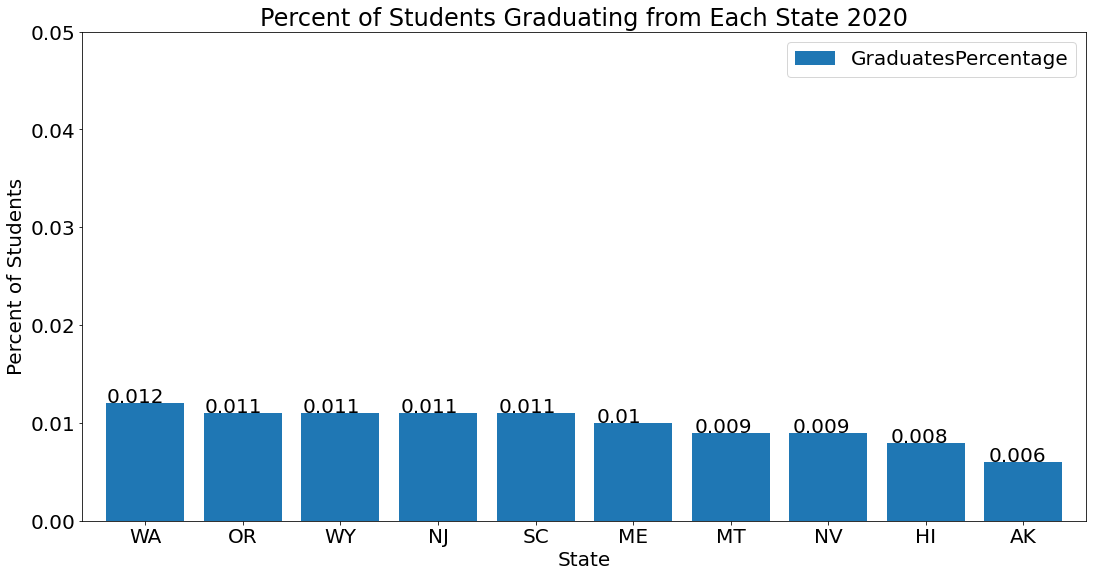

In [269]:
newdf6 = newdf5.sort_values(by=['GraduatesPercentage'], ascending = False)

newdf6['GraduatesPercentage'] = newdf6['GraduatesPercentage'].round(3)


plt.figure(figsize=(25, 9))

ax = newdf5.tail(10).plot.bar(figsize=(18,9), width=.8)

plt.title('Percent of Students Graduating from Each State 2020')
plt.xlabel('State')
plt.ylabel('Percent of Students')
plt.xticks(rotation='horizontal')
plt.rc('font', size=20)

plt.ylim(0, .05)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# All Mens and All Womens Schools

In [270]:
# Looking at all mens schools

print("All men schools")
mendf = combineddf.loc[(combineddf['Grand total women'] == 0) & (combineddf['Grand total men'] > 0)]
mendf['Grand total'].sum()
mendf['INSTNM'].unique()
mendf['INSTNM'].count()


All men schools


141

# Maps

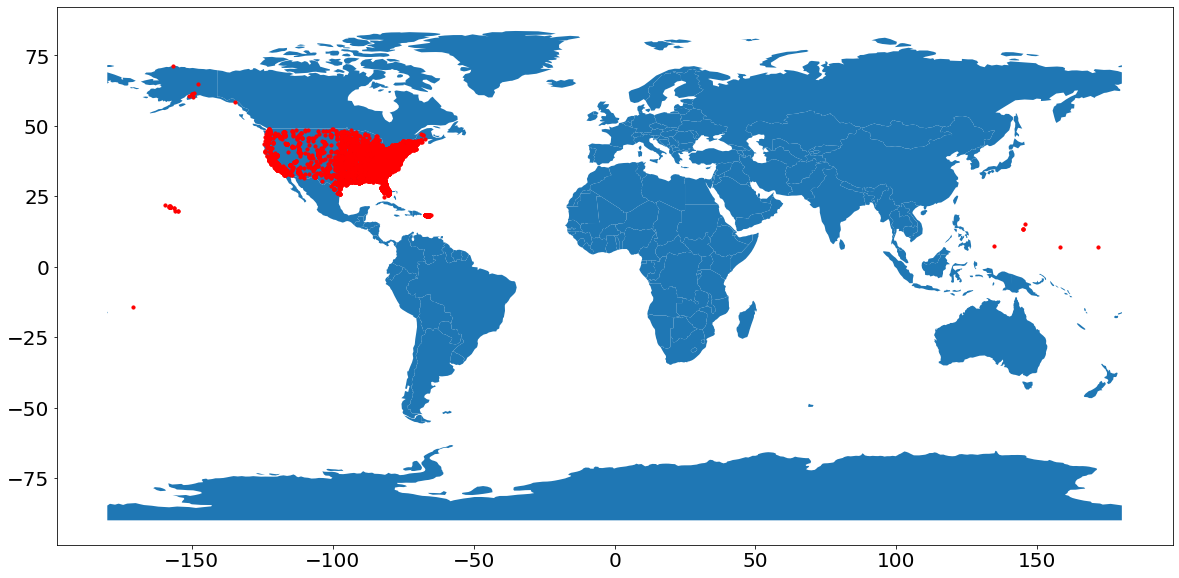

In [271]:
# Maping stuff that shows the locations of the schools

geometry = [Point(xy) for xy in zip(combineddf['LONGITUD'], combineddf['LATITUDE'])]
gdf = GeoDataFrame(combineddf, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', color='red', markersize=10);

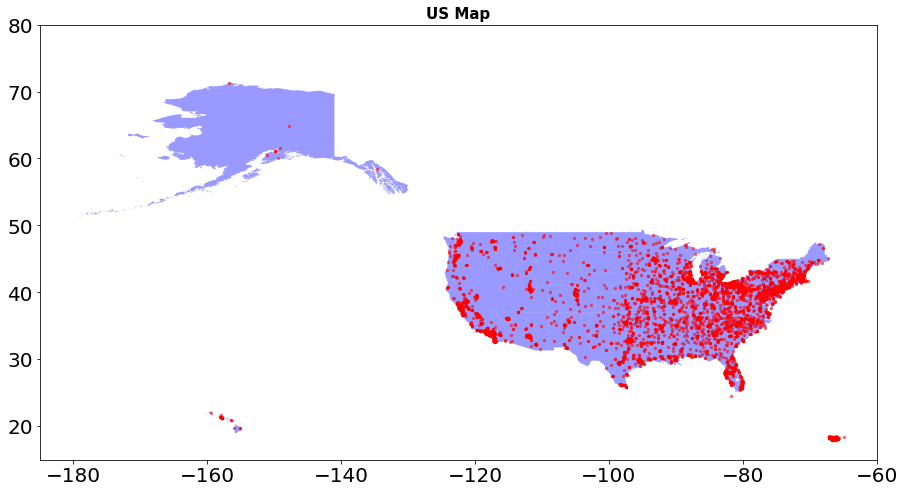

In [272]:
# More mapping

street_map = gpd.read_file('/content/s_08mr23.shp')

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(combineddf['LONGITUD'], combineddf['LATITUDE'])]
# create GeoPandas dataframe
gdf = GeoDataFrame(combineddf, geometry=geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.4,color='blue')
gdf.plot(ax=ax,alpha=0.5, legend=True,markersize = 5, marker='o', color='red')
# add title to graph
plt.title('US Map', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-185, -60)
plt.ylim(15 , 80)
# show map
plt.show()